In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier    #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split     # Import train_test_split function
from sklearn import metrics      #Import scikit-learn metrics module for accuracy calculation
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [11]:
pima = pd.read_csv('/home/kofi/Desktop/pima-indians-diabetes.csv', header=None, names=col_names)

In [12]:
pima.head()
print(pima)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]


In [13]:
# split dataset in feature and target variable

feature_cols =['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[feature_cols] #Features
y = pima.label    #Target variable

In [15]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

As a standard practice, you may follow 70:30 to 80:20 as needed.

Performing The decision tree analysis using scikit learn 

In [16]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(x_train, y_train)

# Predict the response for the dataset
y_pred = clf.predict(x_test)


But we should estimate how accurately the classifier predicts the outcome. The accuracy is computed by comparing actual test set values and predicted values.

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


Looks like our decision tree algorithm has an accuracy of 67.53%. A value this high is usually considered good. 

Now that we have created a decision tree, let’s see what it looks like when we visualise it

The Scikit-learn’s export_graphviz function can help visualise the decision tree. We can use this on our Jupyter notebooks. In case you are not using Jupyter, you may want to look at installing the following libraries:

    Graphviz -converts decision tree classifier into dot file
    Pydotplus- convert this dot file to png or displayable form on Jupyter.


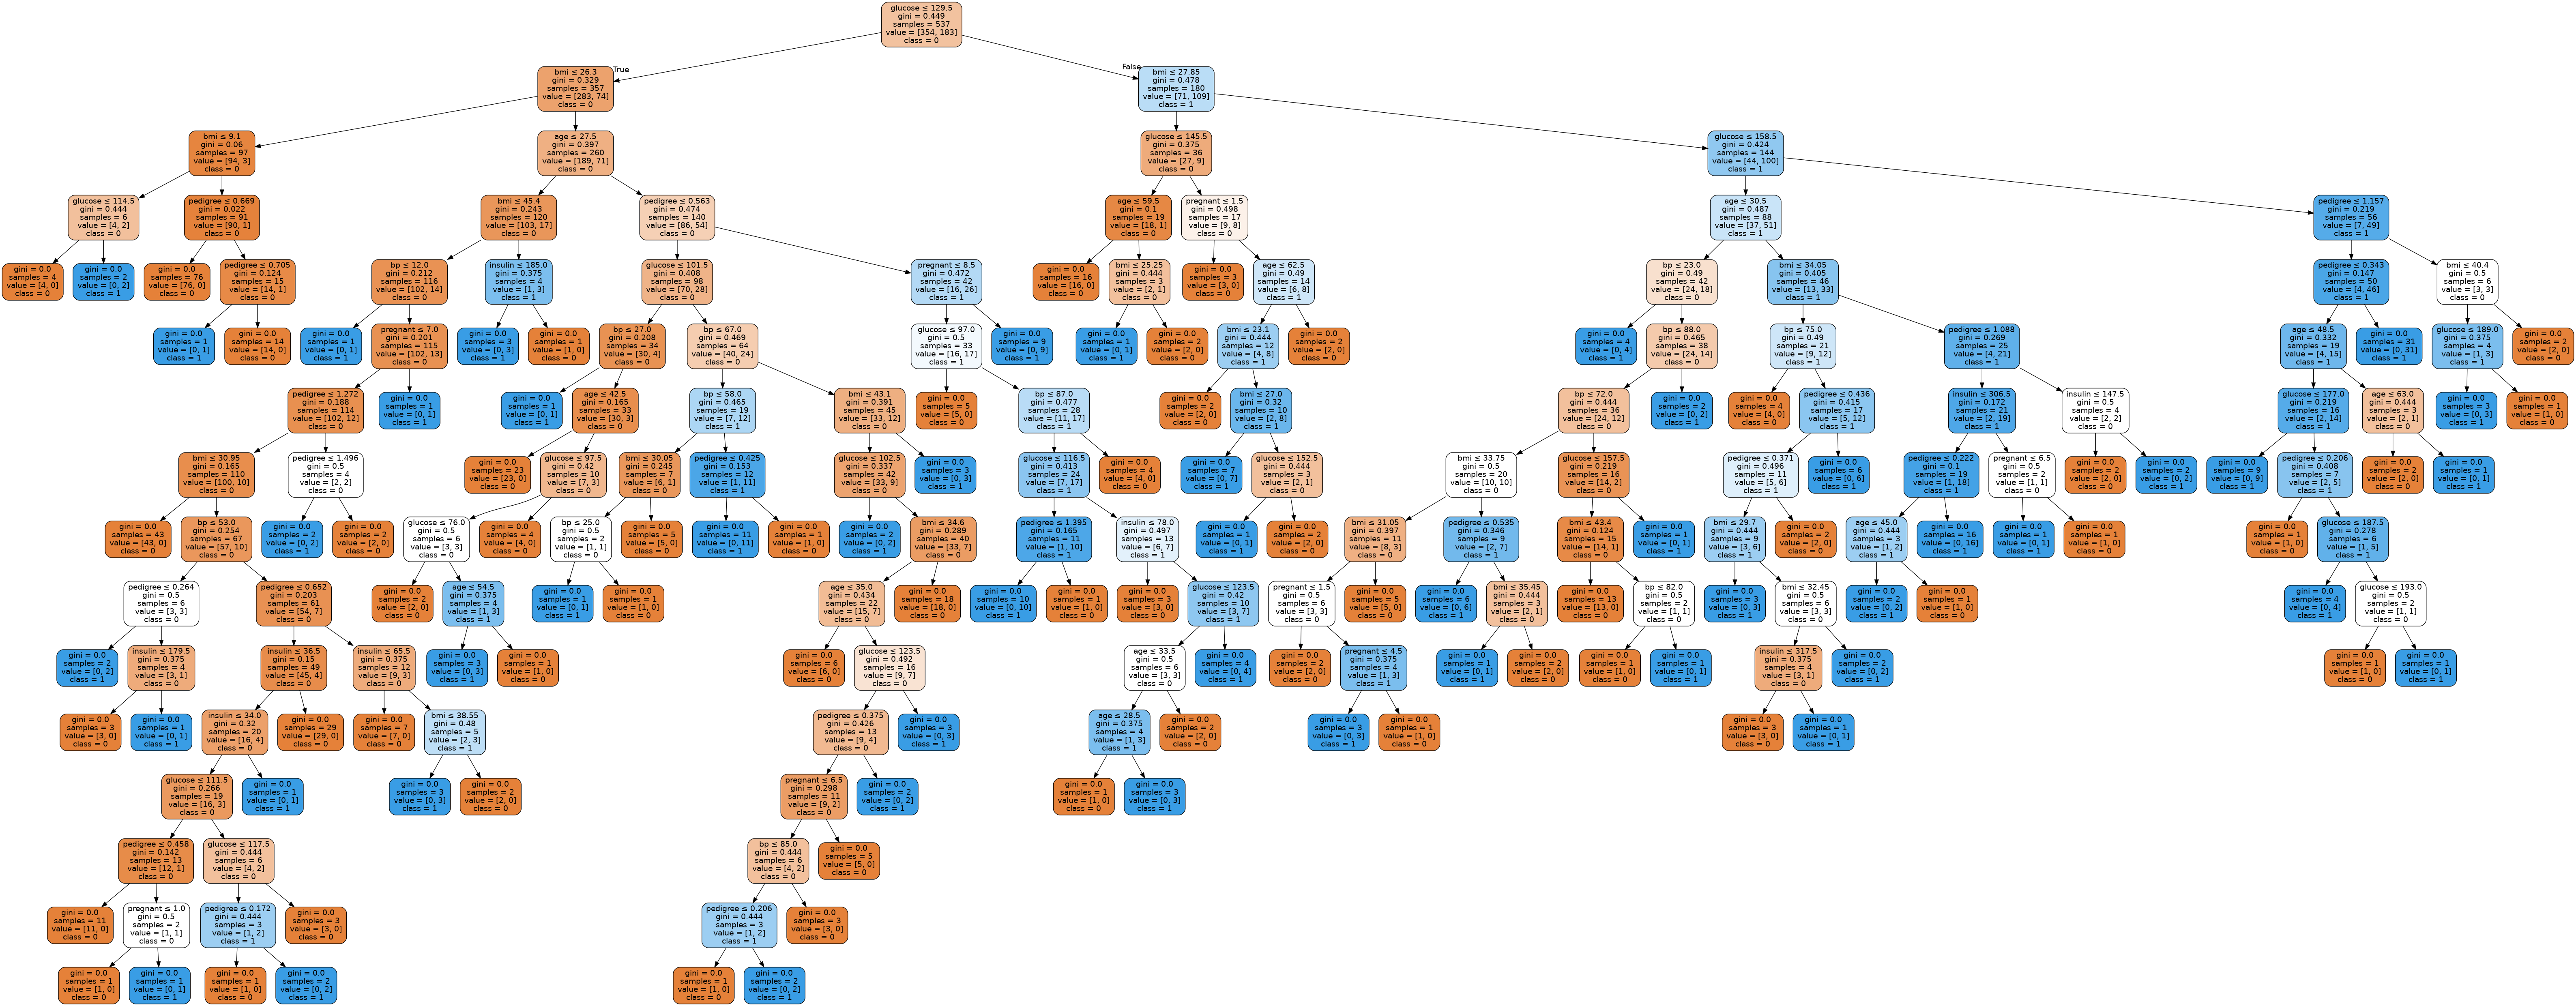

In [20]:
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,
                class_names = ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())




You will notice, that in this extensive decision tree chart, each internal node has a decision rule that splits the data. But are all of these useful/pure? 

Measuring the Impurity of Nodes Created Via Decision Tree Analysis

Gini referred to as Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class. Such nodes are known as the leaf nodes.

In our outcome above, the complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimise it. This optimisation can be done in one of three ways:

   1. criterion: optional (default=”gini”) or Choose attribute selection measure
    This parameter allows us to use the attribute selection measure.
   2. splitter: string, optional (default=”best”) or Split Strategy
    Allows the user to split strategy. You may choose “best” to choose the best split or “random” to choose the best random split.
   3. max_depth: int or None, optional (default=None) or Maximum Depth of a Tree
    This parameter determines the maximum depth of the tree. A higher value of this variable causes overfitting and a lower value causes underfitting.


In our case, we will be varying the maximum depth of the tree as a control variable for pre-pruning. Let’s try max_depth=3.

In [21]:
# Create Decision Tree classifier object 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf =clf.fit(x_train, y_train)

# Predict thr response for test dataset
y_pred = clf.predict(x_test)


In [23]:
# Model Accuracy, how often is classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


On Pre-pruning, the accuracy of the decision tree algorithm increased to 77.05%, which is clearly better than the previous model.